In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Обработка данных

In [43]:
# Загрузка датасета 
olympic_df = pd.read_csv("athletes.csv")
olympic_df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [44]:
olympic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [45]:
olympic_df["dob"] = pd.to_datetime(olympic_df["dob"])

In [46]:
olympic_df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [50]:
# Пропуски решил заполнить средними значениями по данным, вместо того, что бы их удалять.
# Возможно это задача обучения без учителя, сделать модель для заполнения наиболее адекватныи данными, но я пока что не знаю, как это делать т_т
olympic_df["height"] = olympic_df["height"].fillna(olympic_df["height"].mean())
olympic_df["weight"] = olympic_df["weight"].fillna(olympic_df["weight"].mean())
olympic_df["dob"] = olympic_df["dob"].fillna(olympic_df["dob"].mean())
olympic_df.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

In [60]:
# У целевых признаков наблюдается небольшой дисбаланс, думаю это не критично
print(f"Count male: {len(olympic_df.query("sex == 'male'"))} \nCount female: {len(olympic_df.query("sex == 'female'"))}")

Count male: 6333 
Count female: 5205


In [131]:
le = LabelEncoder()
le.fit_transform(olympic_df[["sex"]])
print(f"classes: {le.classes_}")

classes: ['female' 'male']


In [132]:
X = olympic_df[["height", "weight", "sport", "nationality"]]
X = pd.get_dummies(X)
y = olympic_df["sex"]
y = le.transform(olympic_df["sex"])
X.head()

,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_boxing,sport_canoe,sport_cycling,...,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM
0,1.72,64.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.68,56.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.98,79.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.83,80.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.81,71.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
logistic_model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
    )
logistic_model.fit(X_train, y_train)


Score: 0.8232235701906413


# Метрики

In [135]:
y_pred = logistic_model.predict(X_test)

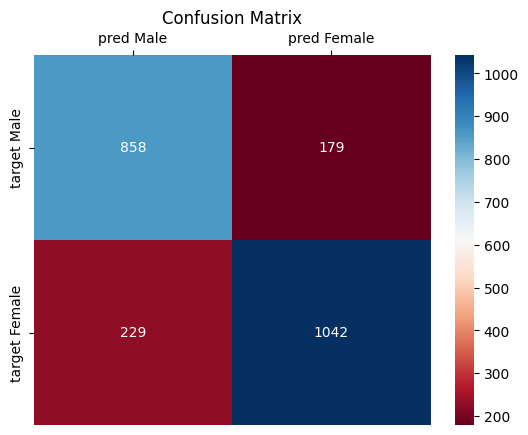

In [222]:
errors_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
errors_matrix_df = pd.DataFrame(
    errors_matrix, 
    columns=["pred Male", "pred Female"],
    index=["target Male", "target Female"],
    
    )
ax = sns.heatmap(errors_matrix_df, fmt="d", annot=True, cmap="RdBu")
ax.xaxis.tick_top()
ax.set(xlabel="", ylabel="")
plt.title("Confusion Matrix")
plt.show()

In [226]:
print( "+-----------+--------+")
print(f"| score     | {round(logistic_model.score(X_test, y_test), 3)}% |")
print(f"| precision | {round(precision_score(y_test, y_pred, average="binary"), 3)}% |")
print(f"| recall    | {round(recall_score(y_test, y_pred, average="binary"), 3)}%  |")
print(f"| f1        | {round(f1_score(y_test, y_pred, average="binary"), 3)}% |")
print( "+-----------+--------+")

+-----------+--------+
| score     | 0.823% |
| precision | 0.853% |
| recall    | 0.82%  |
| f1        | 0.836% |
+-----------+--------+
